##### 01 데이터로드

In [1]:
import pandas as pd

df = pd.read_csv('./data/잡코리아취업데이터종합추추추가.csv')

##### 02 EDA

In [2]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6960 non-null   int64 
 1   회사명         6960 non-null   object
 2   시기          6960 non-null   object
 3   지원분야        5929 non-null   object
 4   대학          6960 non-null   object
 5   계열          6960 non-null   object
 6   전공          4713 non-null   object
 7   학점          6960 non-null   object
 8   토익          6960 non-null   object
 9   토익스피킹       6960 non-null   object
 10  오픽          6960 non-null   object
 11  외국어         6960 non-null   object
 12  자격증         6960 non-null   object
 13  해외경험        6960 non-null   object
 14  인턴          6960 non-null   object
 15  수상내역        6960 non-null   object
 16  봉사          6960 non-null   object
dtypes: int64(1), object(16)
memory usage: 924.5+ KB


In [3]:
# 데이터프레임 head와 tail 확인
df.head()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사
0,0,삼성전자㈜,2023년,해외영업,서울4년제,어문학계열,프랑스어학부,4,945점,-,IH,4개,-,1회,-,1회,2회
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,전자공학과,3.53,-,-,IH,-,2개,-,-,1회,6회
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,컴퓨터공학과,3.83,945점,-,IM1,-,3개,-,3회,-,2회
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,환경공학부,4.06,980점,AM,-,-,3개,1회,-,-,-
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,기계공학과,4.29,-,Lv6,-,-,2개,-,1회,-,-


In [4]:
df.tail()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사
6955,6955,(주)유성티엔에스,2013년,사무담당자,지방4년제,상경계열,경영학과,3.36,-,-,-,-,1개,-,-,-,2회
6956,6956,(주)유성티엔에스,2012년,자재관리자,지방4년제,사회과학계열,도시공학/부동산학과,3.42,-,-,-,-,-,-,-,-,-
6957,6957,(주)유성티엔에스,2011년,자재관리자,초대졸,부동산,NaN,-,-,-,-,-,2개,1회,-,-,-
6958,6958,(주)유성티엔에스,2011년,납품·배송기사,고졸,-,NaN,-,-,-,-,-,2개,-,-,-,-
6959,6959,(주)유성티엔에스,2011년,IT·기술영업,서울4년제,공학계열,화학공학과,3.9,-,-,-,-,3개,-,-,-,-


In [5]:
# 데이터 사이즈 확인
df.shape

(6960, 17)

In [6]:
# 각 특징중에 null인 것 (값이 없는 것)
df.isnull().sum()

Unnamed: 0       0
회사명              0
시기               0
지원분야          1031
대학               0
계열               0
전공            2247
학점               0
토익               0
토익스피킹            0
오픽               0
외국어              0
자격증              0
해외경험             0
인턴               0
수상내역             0
봉사               0
dtype: int64

##### ** null값을 0으로 대체할지, 날릴지? -> 의논이 필요

##### ** describe(), 5 number summary 확인 -> 수치형 데이터로 변환 필요

In [7]:
# '시기' 컬럼을 년도와 월로 나누어 컬럼 
df['년도'] = df['시기'].str.slice(0,4)
df['월'] = df['시기'].str.slice(5,7) # 왜 안될까? + 시기가 head에서 2023'년'으로 찍힌다
df.head()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사,년도,월
0,0,삼성전자㈜,2023년,해외영업,서울4년제,어문학계열,프랑스어학부,4,945점,-,IH,4개,-,1회,-,1회,2회,2023,
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,전자공학과,3.53,-,-,IH,-,2개,-,-,1회,6회,2023,
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,컴퓨터공학과,3.83,945점,-,IM1,-,3개,-,3회,-,2회,2023,
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,환경공학부,4.06,980점,AM,-,-,3개,1회,-,-,-,2023,
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,기계공학과,4.29,-,Lv6,-,-,2개,-,1회,-,-,2023,


In [8]:
# '토익' 컬럼을 토익 점수만 추출
# replace 귀찮아서 위에 코드 복사했습니다
df['토익점수'] = df['토익'].str.slice(0,3)
df.head()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사,년도,월,토익점수
0,0,삼성전자㈜,2023년,해외영업,서울4년제,어문학계열,프랑스어학부,4,945점,-,IH,4개,-,1회,-,1회,2회,2023,,945
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,전자공학과,3.53,-,-,IH,-,2개,-,-,1회,6회,2023,,-
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,컴퓨터공학과,3.83,945점,-,IM1,-,3개,-,3회,-,2회,2023,,945
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,환경공학부,4.06,980점,AM,-,-,3개,1회,-,-,-,2023,,980
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,기계공학과,4.29,-,Lv6,-,-,2개,-,1회,-,-,2023,,-


In [9]:
# 엑셀에서 이상현상(?)을 발견하고 임의적으로 '월'부분을 1로 채웠습니다.
df['월'] = 1
df.head()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사,년도,월,토익점수
0,0,삼성전자㈜,2023년,해외영업,서울4년제,어문학계열,프랑스어학부,4,945점,-,IH,4개,-,1회,-,1회,2회,2023,1,945
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,전자공학과,3.53,-,-,IH,-,2개,-,-,1회,6회,2023,1,-
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,컴퓨터공학과,3.83,945점,-,IM1,-,3개,-,3회,-,2회,2023,1,945
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,환경공학부,4.06,980점,AM,-,-,3개,1회,-,-,-,2023,1,980
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,기계공학과,4.29,-,Lv6,-,-,2개,-,1회,-,-,2023,1,-


##### 03 시각화

In [10]:
# 시각화를 위한 matplotlib 불러오기
import matplotlib.pyplot as plt

In [11]:
# 공학계열의 년도별 토익점수를 시각화합니다
condition = (df['계열'] == '공학계열')
df_filter = df[condition]
df_filter.head()

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사,년도,월,토익점수
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,전자공학과,3.53,-,-,IH,-,2개,-,-,1회,6회,2023,1,-
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,컴퓨터공학과,3.83,945점,-,IM1,-,3개,-,3회,-,2회,2023,1,945
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,환경공학부,4.06,980점,AM,-,-,3개,1회,-,-,-,2023,1,980
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,기계공학과,4.29,-,Lv6,-,-,2개,-,1회,-,-,2023,1,-
6,6,삼성전자㈜,2022년,설비엔지니어,수도권4년제,공학계열,기계과,3.5,900점,-,13,-,2개,-,-,-,3회,2022,1,900


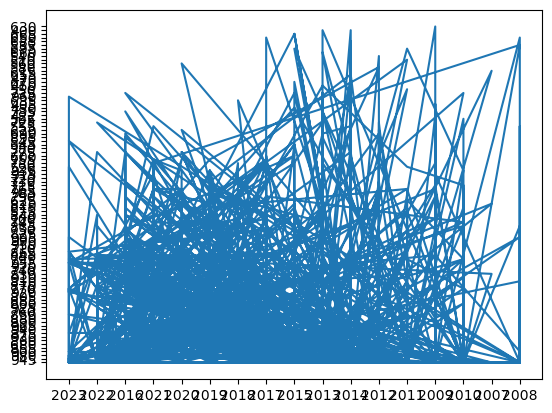

In [12]:
# ㅋㅋㅋ.. 히트맵그래프이나 산점도로 바꿔서 다시해봐야겠어요 회귀는 아닌걸로
plt.plot(df_filter['년도'], df_filter['토익점수'])
plt.show()

##### 04 ML

In [13]:
# 의사결정트리 실행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
# 범주형 데이터를 숫자형으로 변환
df['전공'] = df['전공'].astype('category').cat.codes
df['년도'] = df['년도'].astype('category').cat.codes
df['토익점수'] = df['토익점수'].astype('category').cat.codes
df

,Unnamed: 0,회사명,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사,년도,월,토익점수
0,0,삼성전자㈜,2023년,해외영업,서울4년제,어문학계열,1279,4,945점,-,IH,4개,-,1회,-,1회,2회,16,1,114
1,1,삼성전자㈜,2023년,생산·공정관리자,수도권4년제,공학계열,1010,3.53,-,-,IH,-,2개,-,-,1회,6회,16,1,0
2,2,삼성전자㈜,2023년,소프트웨어개발자,수도권4년제,공학계열,1195,3.83,945점,-,IM1,-,3개,-,3회,-,2회,16,1,114
3,3,삼성전자㈜,2023년,경영·비즈니스기획,서울4년제,공학계열,1398,4.06,980점,AM,-,-,3개,1회,-,-,-,16,1,122
4,4,삼성전자㈜,2023년,설비엔지니어,지방4년제,공학계열,307,4.29,-,Lv6,-,-,2개,-,1회,-,-,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,6955,(주)유성티엔에스,2013년,사무담당자,지방4년제,상경계열,131,3.36,-,-,-,-,1개,-,-,-,2회,6,1,0
6956,6956,(주)유성티엔에스,2012년,자재관리자,지방4년제,사회과학계열,369,3.42,-,-,-,-,-,-,-,-,-,5,1,0
6957,6957,(주)유성티엔에스,2011년,자재관리자,초대졸,부동산,-1,-,-,-,-,-,2개,1회,-,-,-,4,1,0
6958,6958,(주)유성티엔에스,2011년,납품·배송기사,고졸,-,-1,-,-,-,-,-,2개,-,-,-,-,4,1,0


In [15]:
# 독립 변수와 종속 변수 분리
X = df[['전공', '토익점수']]  # 독립 변수
y = df['년도']  # 종속 변수

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# 의사결정 트리 모델 생성 및 훈련
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = clf.predict(X_test)

In [17]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.28
